# Importing Data (Same in All notebooks)

In [1]:
## Importing library
import numpy as np
import pandas as pd
np.random.seed(100)

data = pd.read_csv('/users/rohanchitte/downloads/Dataset_lyrics.csv_lyrics.csv')

In [2]:
filtered = data[data['lyrics'].notnull()]
filtered

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...,...
362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,"I gotta say\nBoy, after only just a couple of ..."
362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring\nYou made m...
362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth\nLooks ...
362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth\nAnd I'm meas...


# Data Pre-processing (Same in All notebooks)

In [3]:
import nltk
from nltk.corpus import stopwords

cleaned = filtered.copy()

# Remove punctuation
cleaned['lyrics'] = cleaned['lyrics'].str.replace("[-\?.,\/#!$%\^&\*;:{}=\_~()]", ' ')

# Remove song-related identifiers like [Chorus] or [Verse]
cleaned['lyrics'] = cleaned['lyrics'].str.replace("\[(.*?)\]", ' ')
cleaned['lyrics'] = cleaned['lyrics'].str.replace("' | '", ' ')
cleaned['lyrics'] = cleaned['lyrics'].str.replace('x[0-9]+', ' ')

# Remove all songs without lyrics (e.g. instrumental pieces)
cleaned = cleaned[cleaned['lyrics'].str.strip().str.lower() != 'instrumental']

# Remove any songs with corrupted/non-ASCII characters, unavailable lyrics
cleaned = cleaned[~cleaned['lyrics'].str.contains(r'[^\x00-\x7F]+')]
cleaned = cleaned[cleaned['lyrics'].str.strip() != '']
cleaned = cleaned[cleaned['genre'].str.lower() != 'not available']

#Selecting Pop, Rock, Country, Jazz
cleaned = cleaned.loc[(cleaned['genre'] == 'Pop') | 
            (cleaned['genre'] == 'Country') |
            (cleaned['genre'] == 'Rock') |
            (cleaned['genre'] == 'Hip-Hop') |
            (cleaned['genre'] == 'Jazz') ]
cleaned.reset_index(inplace = True)

cleaned
print(len(cleaned))

from nltk.corpus import stopwords
stop = stopwords.words('english')
#removing stop words from lyrics

cleaned['lyrics'] = cleaned['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#lemmatizing lyrics
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text, flg_lemm=True):
    #Convert string to list (tokenize)
    lst_text = text.split()

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
        
    ## back to string from list
    text = " ".join(lst_text)
    return text
    
#cleaned["lyrics"] = cleaned["lyrics"].apply(lemmatize_text)

cleaned["lyrics"]  = cleaned["lyrics"].apply(lambda x:  lemmatize_text(x))

df = cleaned.drop(labels=["level_0", "index","song","year","artist"], axis=1)

185493


# Data Visualization - Histogram

In [4]:
df

,genre,lyrics
0,Pop,Oh baby You know I'm gonna cut right chase Som...
1,Pop,playin everything easy like seem sure still wa...
2,Pop,If search For tenderness It hard find You love...
3,Pop,Oh oh oh I oh oh oh I If I wrote book stand Th...
4,Pop,Party people people party popping sitting arou...
...,...,...
185488,Country,I gotta say Boy couple date You're hand outrig...
185489,Country,I helped find diamond ring You made try everyt...
185490,Country,Look couple corner booth Looks lot like She's ...
185491,Country,When I fly mortal earth And I'm measured depth...


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

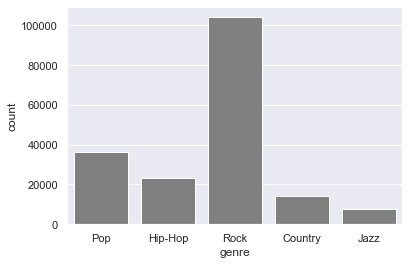

In [5]:
import seaborn as sns
sns.set()

sns.countplot(df['genre'], color='gray')

In [6]:
from sklearn.preprocessing import LabelEncoder
Y = df["genre"]
Y = LabelEncoder().fit_transform(Y)

In [7]:
df['Y'] = Y.tolist()

In [8]:
df["Y"]

0         3
1         3
2         3
3         3
4         3
         ..
185488    0
185489    0
185490    0
185491    0
185492    0
Name: Y, Length: 185493, dtype: int64

# Splitting Data into Train and Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["lyrics"],df["Y"], test_size=0.20, random_state=42)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

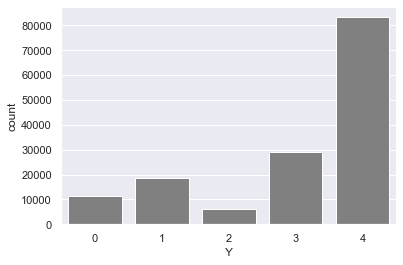

In [10]:
#Visualizing Y - Genres of training set
import seaborn as sns
sns.set()

sns.countplot(y_train, color='gray')

# Data Augmentation 

In [11]:
#Creating artificial data to create more training data for Y Genre: Jazz (2)
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute",aug_max=3)

augmented_sentences=[]
augmented_sentences_labels=[]
jazz_index = []
for i in X_train.index:
    if y_train[i]==2:
        jazz_index.append(i)
        temps=aug.augment(X_train[i],n=2)
        for sent in temps:
            augmented_sentences.append(sent)
            augmented_sentences_labels.append(2)
            
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)


print(X_train.shape)
print(y_train.shape)

(160368,)
(160368,)


In [ ]:
# Increase in training set from 148395 lyrics to 160368. So, Nearly 12000 aritificial jazz lyrics were added. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

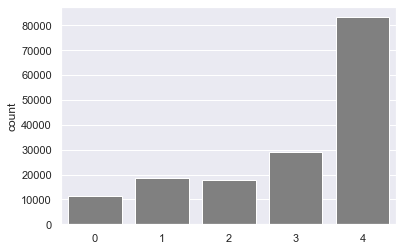

In [12]:
#Visualizing the increase in data using histogram
import seaborn as sns
sns.set()

sns.countplot(y_train, color='gray')

# Bert Model

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
from official.nlp import bert
from tensorflow import keras

/opt/anaconda3/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

def remove_non_ascii(text):
    doc = nlp(text)
    to_return =  " ".join([str(token) for token in doc if token.is_ascii])
    return to_return

X_train = X_train.apply(remove_non_ascii)

In [15]:
X_test = X_test.apply(remove_non_ascii)

In [16]:
#### selecting BERT encoder having transformer layers(L) = 4, ####dimension of o/p = 512 & no. of multi-headed attention = 8
tf_bert_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

####choosing pre-processor that is compatible with BERT encoder ####selected
tf_bert_pre_process = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tf_bert_pre_process, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tf_bert_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(5, activation='softmax', name='classifier')(net)
    #net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

INFO:absl:Using /var/folders/fl/kwcrn5_93n55xjv_rvr1d1080000gn/T/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3, Total size: 1.96MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.
INFO:absl:Downloading https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1: 70.00MB
INFO:absl:Downloaded https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1, Total size: 115.55MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'.


In [17]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()
epochs = 7
steps_per_epoch = 11370
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps,num_warmup_steps=num_warmup_steps, optimizer_type='adamw')
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

INFO:absl:using Adamw optimizer
INFO:absl:gradient_clip_norm=1.000000


In [20]:
from sklearn.preprocessing import LabelBinarizer

def get_encoded_labels(topic_clusters):
    encoder = LabelBinarizer()
    encoded_labels = encoder.fit_transform(topic_clusters)
    return encoded_labels
#http://localhost:8888/notebooks/Text%20data%20augmentation-Copy2-%20BERT%20with%20data%20augmented.ipynb#
labels = get_encoded_labels(y_train)

labelsval = get_encoded_labels(y_test)

# Fitting the model

In [ ]:
history = classifier_model.fit(X_train,labels,epochs=epochs,verbose=1,validation_data =(X_test, labelsval))

Epoch 1/7


/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


5012/5012 [==============================] - 60383s 12s/step - loss: 1.0618 - categorical_accuracy: 0.5908 - val_loss: 0.8502 - val_categorical_accuracy: 0.6767
Epoch 2/7
5012/5012 [==============================] - 68383s 14s/step - loss: 0.8581 - categorical_accuracy: 0.6745 - val_loss: 0.8028 - val_categorical_accuracy: 0.6989
Epoch 3/7
5012/5012 [==============================] - 65567s 13s/step - loss: 0.7252 - categorical_accuracy: 0.7272 - val_loss: 0.8014 - val_categorical_accuracy: 0.7076
Epoch 4/7
5012/5012 [==============================] - 65542s 13s/step - loss: 0.6106 - categorical_accuracy: 0.7691 - val_loss: 0.8198 - val_categorical_accuracy: 0.7158
Epoch 5/7
5012/5012 [==============================] - 64529s 13s/step - loss: 0.5200 - categorical_accuracy: 0.8039 - val_loss: 0.8904 - val_categorical_accuracy: 0.7136
Epoch 6/7
5012/5012 [==============================] - 68386s 14s/step - loss: 0.4462 - categorical_accuracy: 0.8327 - val_loss: 0.9507 - val_categorical_a

# Training interrupted as the validation accuracy was not improving. Best accuracy of 71.58 % was observed after training the model for 5 epochs. 